#BOW Approach:

In [1]:
!pip install pandas_ml
import os
import json
import keras
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
import math
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from pandas_ml import ConfusionMatrix
from sklearn.metrics import accuracy_score
import seaborn as sn
import matplotlib.pyplot as plt

    100% |████████████████████████████████| 81kB 3.2MB/s 
  Running setup.py bdist_wheel for pandas-ml ... - \ done
  Stored in directory: /root/.cache/pip/wheels/4b/b0/88/51fb7203a0f81becae3e92d5bf9fee0460375e5408e67a7dc3
Successfully built pandas-ml


Using TensorFlow backend.


In [0]:
num_words=1300

In [0]:
with open('data.json','r') as f:
    data_all = f.read()

In [0]:
data = json.loads(data_all)

In [0]:
tokenizer = Tokenizer(num_words=num_words)

In [0]:
X = list(data['Text'].values())

In [7]:
tokenizer.fit_on_texts(X)

sequences = tokenizer.texts_to_sequences(X)

X = tokenizer.texts_to_matrix(X)

word_index = tokenizer.word_index

print('Found %s unique tokens.' % len(word_index))

Found 3710 unique tokens.


In [0]:
(x_train,x_test,y_train,y_test)=train_test_split(X,list(data['Sentiment'].values()),random_state=42)

In [9]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [0]:
y_pred = lr.predict(x_test)

In [11]:
print("Score for train: "+str(lr.score(x_train,y_train)))
print("Score: "+str(lr.score(x_test,y_test)))

Score for train: 0.9957081545064378
Score: 0.6666666666666666


Accuracy Score:  0.6666666666666666
Predicted  Negative  Neutral  Positive  __all__
Actual                                         
Negative          2        3         6       11
Neutral           3       36        20       59
Positive          7       13        66       86
__all__          12       52        92      156


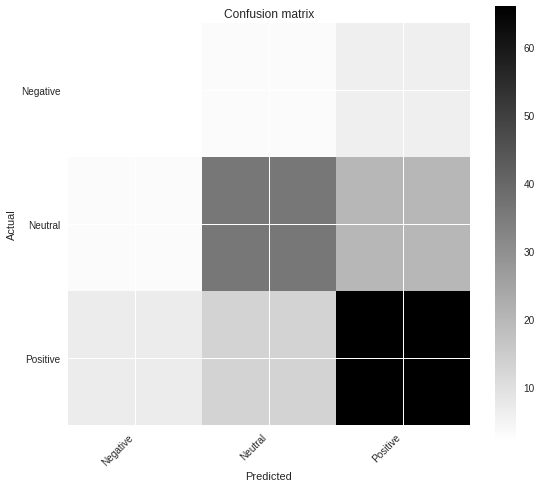

In [12]:
# Compute confusion matrix with LogisticRegression:

cnf_matrix = ConfusionMatrix(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)


print('Accuracy Score: ', acc_score)

print(cnf_matrix)

cnf_matrix.plot()
plt.show()

In [13]:
bg=GaussianNB()
bg.fit(x_train,y_train)

GaussianNB(priors=None)

In [14]:
y_pred = bg.predict(x_test)
print("Score for train: "+str(bg.score(x_train,y_train)))
print("Score: "+str(bg.score(x_test,y_test)))

Score for train: 0.944206008583691
Score: 0.6282051282051282


Accuracy Score:  0.6282051282051282
Predicted  Negative  Neutral  Positive  __all__
Actual                                         
Negative          0        5         6       11
Neutral           3       28        28       59
Positive          0       16        70       86
__all__           3       49       104      156


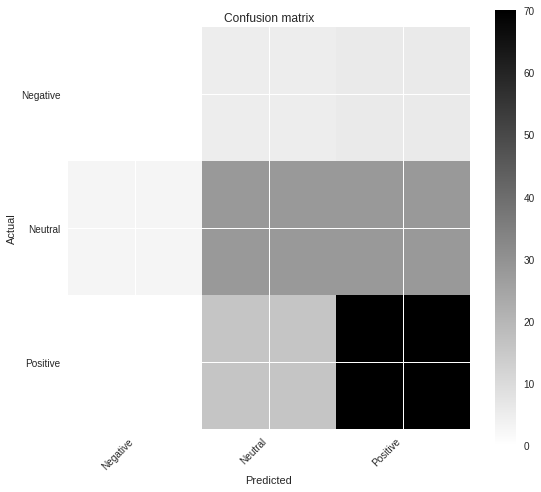

In [15]:
# Compute confusion matrix from GaussianNB:

cnf_matrix = ConfusionMatrix(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)


print('Accuracy Score: ', acc_score)

print(cnf_matrix)

cnf_matrix.plot()
plt.show()

In [16]:
ber=BernoulliNB()
ber.fit(x_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [17]:
y_pred = ber.predict(x_test)
print("Score for train: "+str(ber.score(x_train,y_train)))
print("Score: "+str(ber.score(x_test,y_test)))

Score for train: 0.851931330472103
Score: 0.7051282051282052


Accuracy Score:  0.7051282051282052
Predicted  Negative  Neutral  Positive  __all__
Actual                                         
Negative          3        7         1       11
Neutral           1       37        21       59
Positive          2       14        70       86
__all__           6       58        92      156


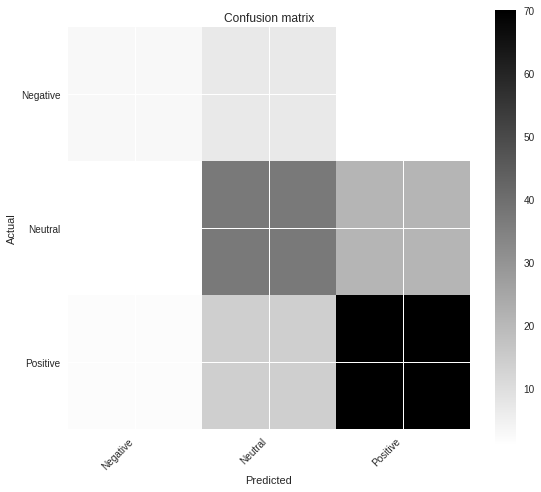

In [18]:
from pandas_ml import ConfusionMatrix
from sklearn.metrics import accuracy_score
import seaborn as sn
import matplotlib.pyplot as plt

# Compute confusion matrix BernoulliNB:

cnf_matrix = ConfusionMatrix(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)


print('Accuracy Score: ', acc_score)

print(cnf_matrix)

cnf_matrix.plot()
plt.show()